# Excercise
Get to know EDA (Exploratory Data Analysis)
- `Pandas` for data loading, data cleaning 
- `matplotlib`, `seaborn` for data visualization
- Feature Engineering for tabular data


We have a dataset that includes almost **features of houses**. The goal is to predict the **sales price** of each house.
We try to understand the dataset and get some insights.
Note that understanding data is the first and also the most important of an AI project. So have fun with this :)

## Load libraries and data

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings as w
w.filterwarnings('ignore')

In [145]:
# df = pd.read_csv("data//train.csv")

In [146]:
# df.head(5)

In [147]:
# df.shape

In [148]:
# df.info()

In [7]:
# list(df.columns)

In [150]:
# df.index

In [151]:
# df.describe(include = "all")

In [44]:
# df.loc[(df.SalePrice == 140000) & (df.MSZoning == "RM")]

In [49]:
# df.iloc[[9]]

In [34]:
# df.iloc[3:11]

In [60]:
# df.iloc[:, [-1]]

In [156]:
# df.LandContour.dtype

In [157]:
# df.Id.dtype

In [158]:
# df["total_price"] = df["SalePrice"] * -1
# df.head()

In [159]:
# revenue = df["total_price"].sum()
# print(revenue)

In [160]:
# df.groupby("LandContour")["MoSold"].sum().sort_values(ascending = False)

In [63]:
# df.MSZoning.value_counts().count()

In [162]:
# df.MSZoning.nunique()

1. Oops, no module named ...? Please fix this.

2. Ok, let's load the dataset to Pandas's dataframes:

In [3]:
df = pd.read_csv("data//train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Let's see the data

### Data Exploration
Let's try to answer all questions below (with source code and graphs if needed).

3. Check types of each column

In [164]:
# col = list(df.columns)
# for c in col:
#     print(c, df[c].dtype)

4. How many columns (features), rows of this dataset?

In [184]:
# print("columns:", df.shape[0], ", rows:", df.shape[1])

5. How many numerical features, time features, discrete features, continuous features, categoricals features? Find basic statistics (min, max, mean, standard deviation) of each features.

In [75]:
# df.describe()
# dfcp = df.select_dtypes(include=['object']).copy()
# dfcp.describe()

6. How many duplicated rows?

In [100]:
# df.shape[0] - df.iloc[:, 1:].duplicated().count()

7. How many missing values of each feature?

In [29]:
# lt = list(dfcp.columns)
# for i in lt:
#     print(i, df.shape[0] - df.groupby(i)[i].count().sum())
# print(dfcp.isnull().sum())

8. Count unique values of each feature

In [18]:
# lt = list(dfcp.columns)
# for i in lt:
#     print(i, df[i].nunique())

9. Plot the distribution of sale price (target). Also check sale price distribution in log scale. Any insights?

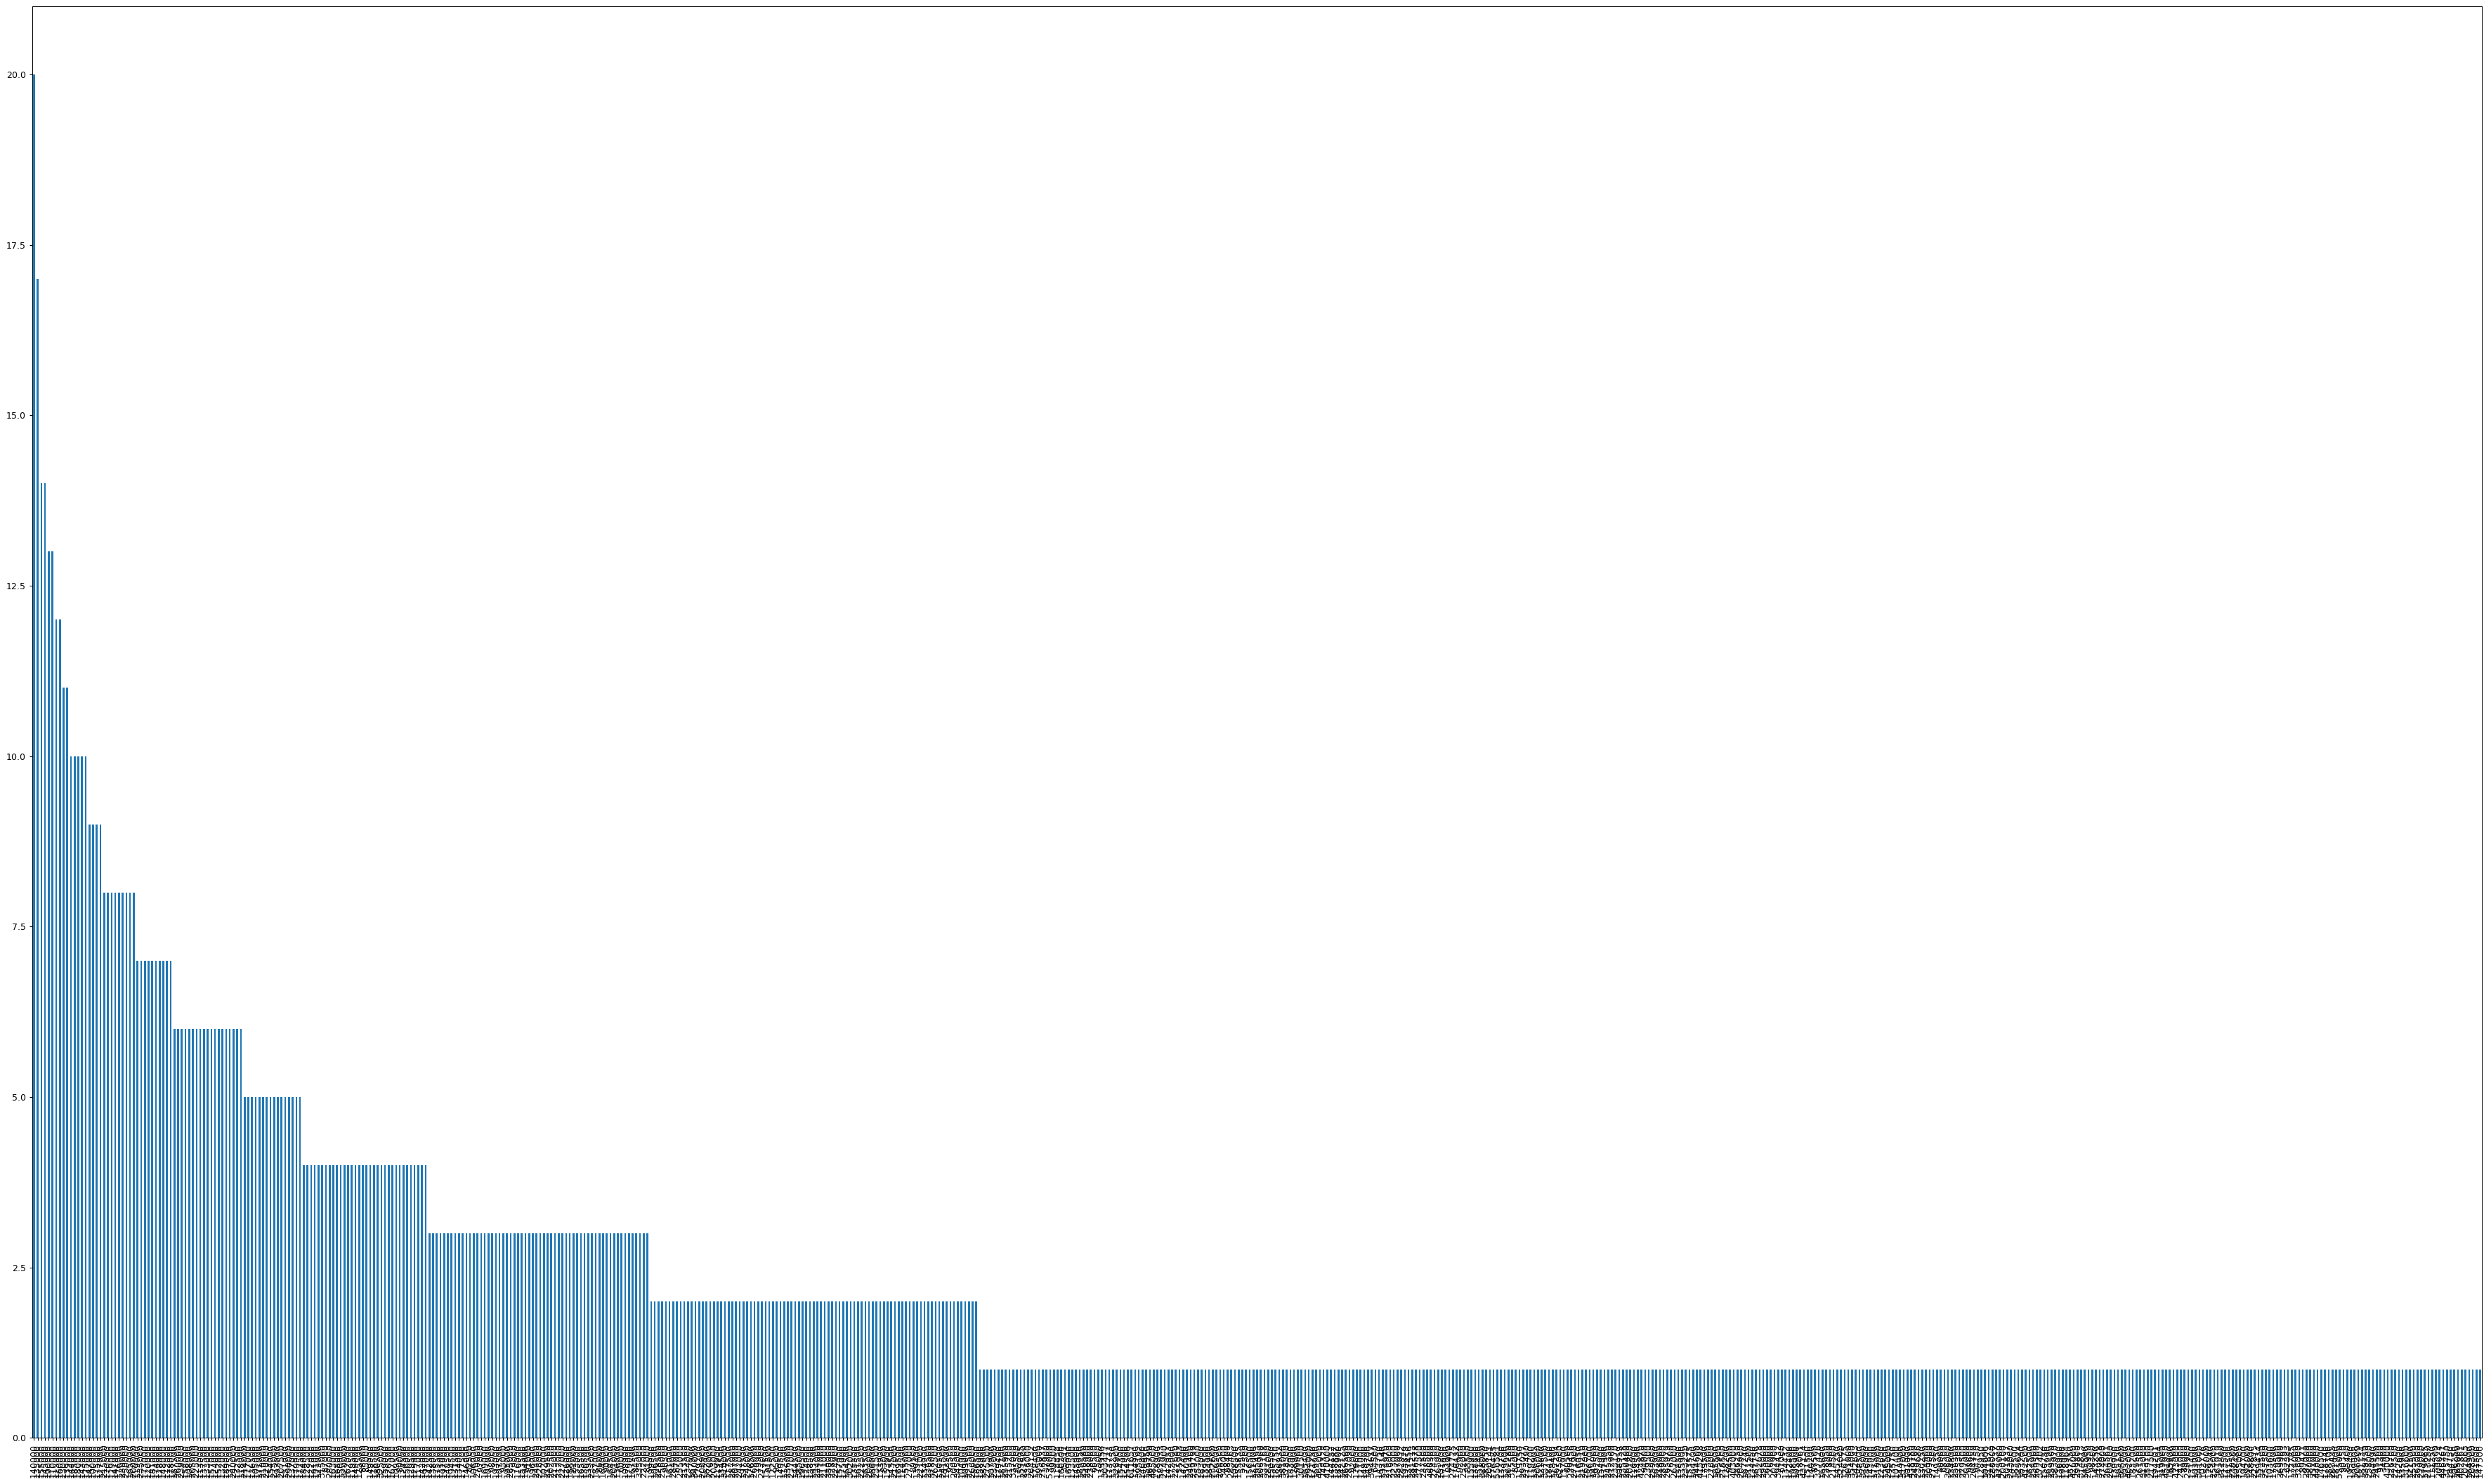

In [11]:
plt.figure(figsize = (50, 30), dpi = 90)
df.SalePrice.value_counts().plot(kind = 'bar', align = 'center');

10. Check correlation of each feature to target. Which features are the most important? Any insights? 

<AxesSubplot:>

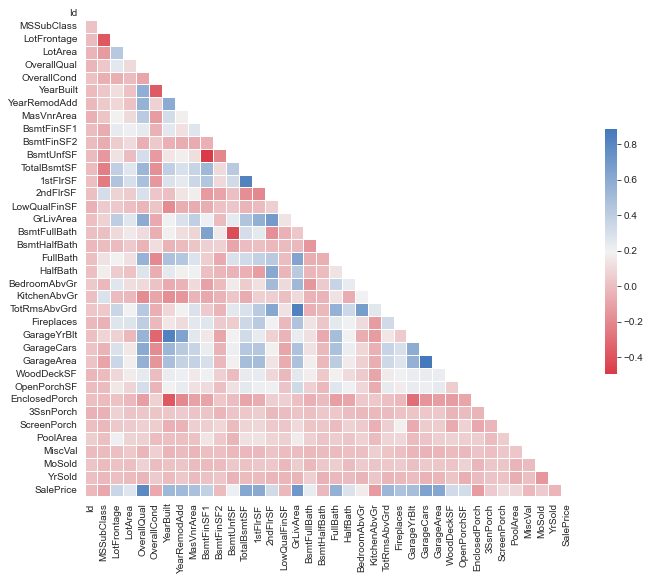

In [12]:
corr_matrix = df.corr()
# print(corr_matrix["SalePrice"].sort_values(ascending=False))
mask = np.triu(np.ones_like(corr_matrix, dtype = np.bool))
sns.set_style(style = 'white')
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(10, 250, as_cmap=True)
sns.heatmap(corr_matrix, mask = mask, cmap = cmap,
                square = True,
                linewidth = .5, cbar_kws={'shrink':.5}, ax = ax)

11. Check correlations of numerical features to each others. Any insights?

12. Do you know skewess and kurtosis? Try to explain them and check this dataset.

No

13. Check outliers of this dataset

14. Compare train set and test set. Do they have the same distributions?

15. Hypothesis: does sale price go up each year? Confirm it.

16. Hypotheis: seasons (spring, summer, fall, winter) also affect sale price. Confirm it.

17. Think up 3 other hypotheses and confirm them.

### Feature Engineering

18. Numerical features:
- What can we do with these features? How to handle missing values? Do we need to scale each feature?
- Let's practice with our dataset.

19. Categorical features:
- Understand OneHotEncoder, OrdinalEncoder. Do you know Target Encoding? When to use Target Encoding and does it have caveats?
- Try to encode the categorical features in this dataset using suitable encoders above.